In [1]:
import sklearn

In [1]:
!pip install numpy
!pip install pandas
!pip install mglearn

In [ ]:
import numpy as np
import pandas as pd
import mglearn
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import ToCategorical
%matplotlib inline

In [3]:
dataset_read = pd.read_csv('test30_augmented.csv', nrows=1000)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(dataset_read.shape)

(1000, 34)


In [4]:
data = pd.DataFrame(dataset_read)
display(data)

,tcp.flags,tcp.time_delta,tcp.len,mqtt.conack.flags,mqtt.conack.flags.reserved,mqtt.conack.flags.sp,mqtt.conack.val,mqtt.conflag.cleansess,mqtt.conflag.passwd,mqtt.conflag.qos,mqtt.conflag.reserved,mqtt.conflag.retain,mqtt.conflag.uname,mqtt.conflag.willflag,mqtt.conflags,mqtt.dupflag,mqtt.hdrflags,mqtt.kalive,mqtt.len,mqtt.msg,mqtt.msgid,mqtt.msgtype,mqtt.proto_len,mqtt.protoname,mqtt.qos,mqtt.retain,mqtt.sub.qos,mqtt.suback.qos,mqtt.ver,mqtt.willmsg,mqtt.willmsg_len,mqtt.willtopic,mqtt.willtopic_len,target
0,0x00000010,0.000000,1460,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0x0000003a,0.0,163.0,6633344437633931613762653642343942666445306566...,8036.0,3.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,dos
1,0x00000010,0.000003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
2,0x00000010,0.000012,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,slowite
3,0x00000010,0.000005,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flood
4,0x00000018,0.000314,4,0x00000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000020,0.0,2.0,0.0,0.0,2.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,slowite
5,0x00000010,0.000011,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,flood
6,0x00000018,0.000102,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x000000d0,0.0,0.0,0,0.0,13.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
7,0x00000018,0.999946,10,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0x00000030,0.0,8.0,32,0.0,3.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
8,0x00000010,0.000003,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,legitimate
9,0x00000011,0.000004,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,bruteforce


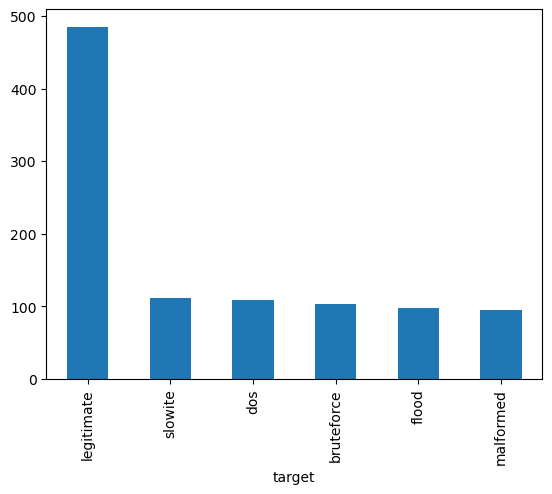

In [5]:
data['target'].value_counts().plot(kind='bar')
plt.show()

Conversão dos dados tcp.flags para STRING

In [6]:
for number, row in data.iterrows():                     # number represents de index of the column
    if row['tcp.flags'] == "0x00000010":                # row represents the data of the row
        data.at[number, 'tcp.flags'] = "ACK"            # the method at. update the row to the new value
    elif row['tcp.flags'] == "0x00000002":
        data.at[number, 'tcp.flags'] = "SYN"
    elif row['tcp.flags'] == "0x00000012":
        data.at[number, 'tcp.flags'] = "SYN ACK"
    elif row['tcp.flags'] == "0x00000011":
        data.at[number, 'tcp.flags'] = "FIN ACK"
    elif row['tcp.flags'] == "0x00000004":
        data.at[number, 'tcp.flags'] = "RST"
    elif row['tcp.flags'] == "0x00000014":
        data.at[number, 'tcp.flags'] = "RST ACK"
    elif row['tcp.flags'] == "0x00000018":
        data.at[number, 'tcp.flags'] = "PSH ACK"
    elif row['tcp.flags'] == "0x00000019":
        data.at[number, 'tcp.flags'] = "ZERO"

In [7]:
print(data['tcp.flags'])

0          ACK
1          ACK
2          ACK
3          ACK
4      PSH ACK
5          ACK
6      PSH ACK
7      PSH ACK
8          ACK
9      FIN ACK
10         ACK
11     PSH ACK
12     SYN ACK
13     PSH ACK
14     PSH ACK
15         ACK
16         ACK
17         ACK
18     PSH ACK
19     PSH ACK
20     PSH ACK
21     PSH ACK
22         ACK
23     SYN ACK
24         ACK
25     SYN ACK
26     PSH ACK
27     PSH ACK
28     PSH ACK
29     PSH ACK
30     FIN ACK
31         ACK
32         SYN
33         RST
34        ZERO
35     PSH ACK
36     PSH ACK
37         ACK
38     PSH ACK
39     PSH ACK
40     PSH ACK
41     SYN ACK
42     PSH ACK
43     PSH ACK
44     PSH ACK
45     PSH ACK
46     PSH ACK
47         ACK
48         ACK
49     PSH ACK
50         ACK
51         ACK
52     PSH ACK
53     PSH ACK
54     FIN ACK
55     PSH ACK
56         ACK
57         ACK
58     PSH ACK
59     PSH ACK
60         ACK
61     PSH ACK
62     PSH ACK
63     FIN ACK
64     PSH ACK
65     PSH ACK
66     PSH

Converão dos dados mqtt.hdrflags para STRING

In [8]:
print(data['mqtt.hdrflags'].unique())

['0x0000003a' '0' '0x00000020' '0x000000d0' '0x00000030' '0x00000032'
 '0x00000040' '0x00000010' '0x000000c0' '0x00000050' '0x00000082']


Gráficos 2d

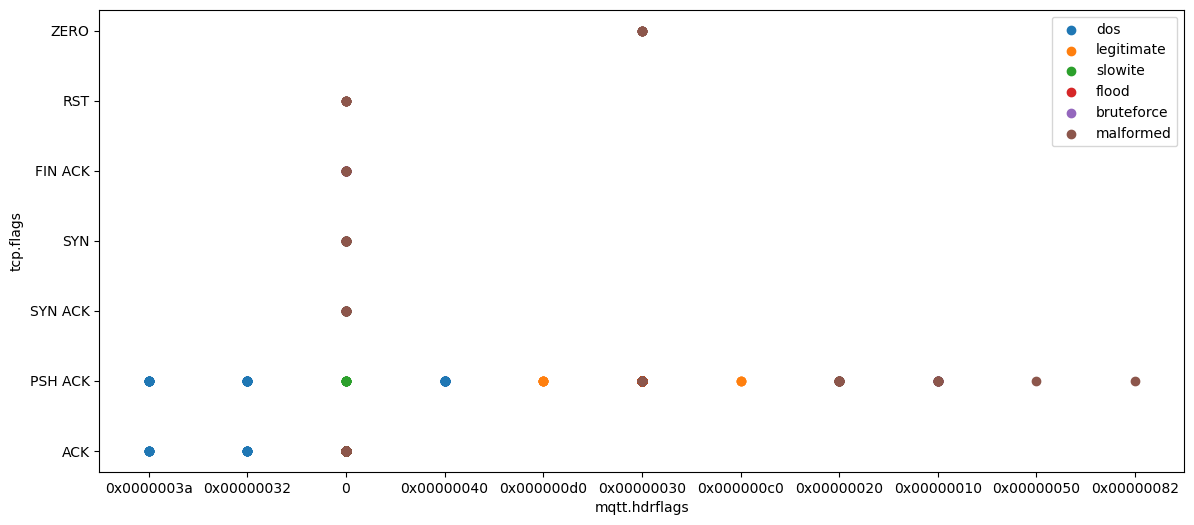

In [9]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['mqtt.hdrflags'], dataclass['tcp.flags'], label=i)
plt.xlabel('mqtt.hdrflags')
plt.ylabel('tcp.flags')
plt.legend()
plt.title('')
plt.show()

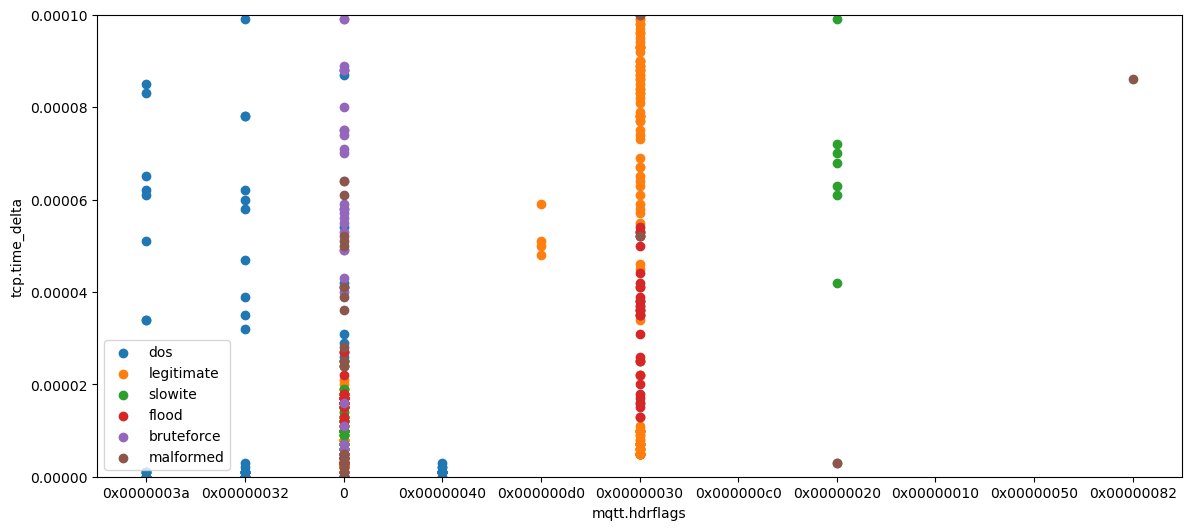

In [10]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['mqtt.hdrflags'], dataclass['tcp.time_delta'], label=i)
plt.xlabel('mqtt.hdrflags')
plt.ylabel('tcp.time_delta')

plt.ylim(0,0.0001)

plt.legend()
plt.title('')
plt.show()

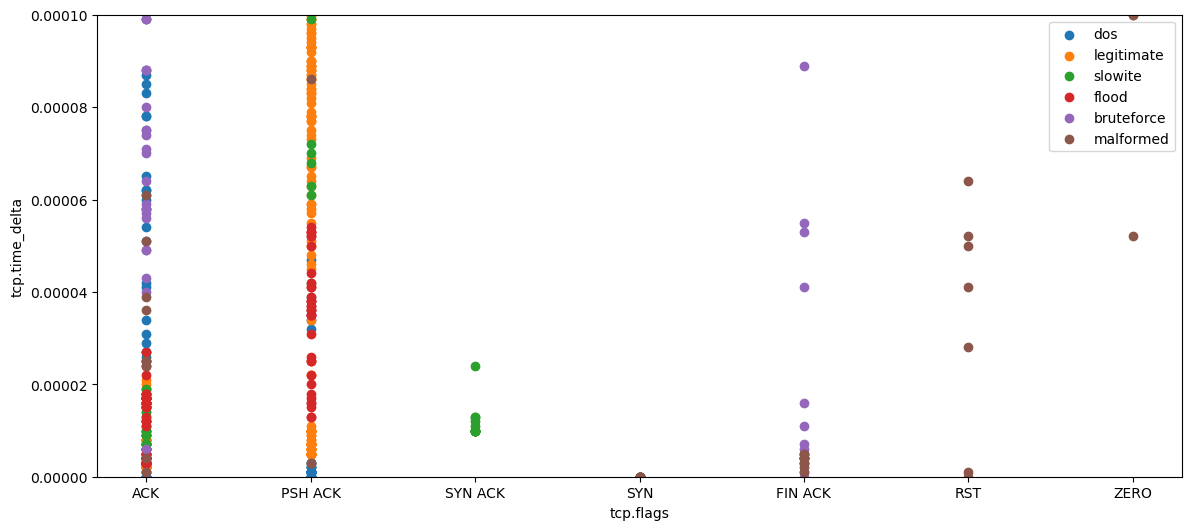

In [11]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['tcp.time_delta'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('tcp.time_delta')


plt.ylim(0,0.0001)


plt.legend()
plt.title('')
plt.show()

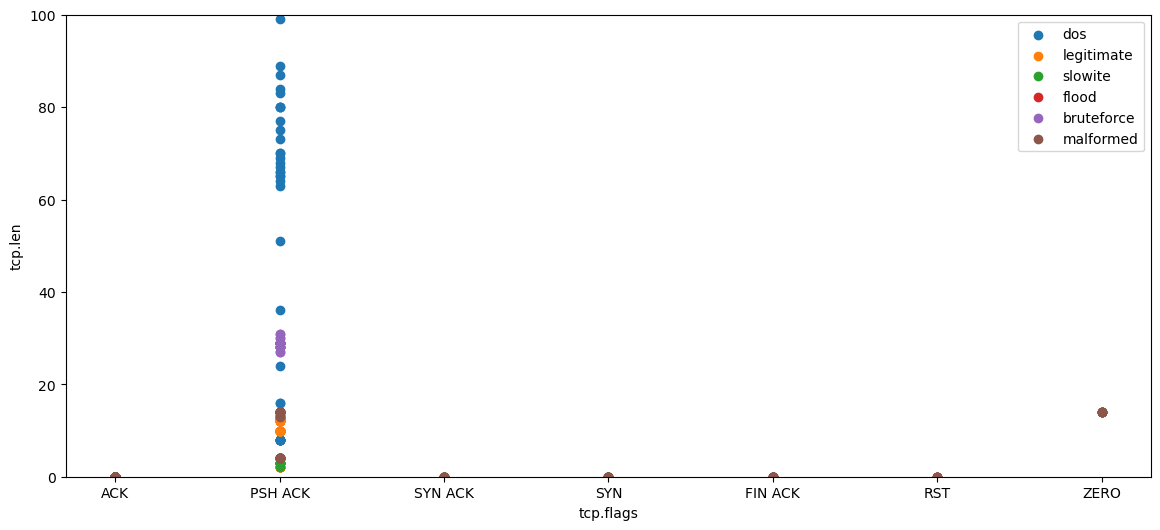

In [12]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['tcp.len'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('tcp.len')

plt.ylim(0,100)


plt.legend()
plt.title('')
plt.show()

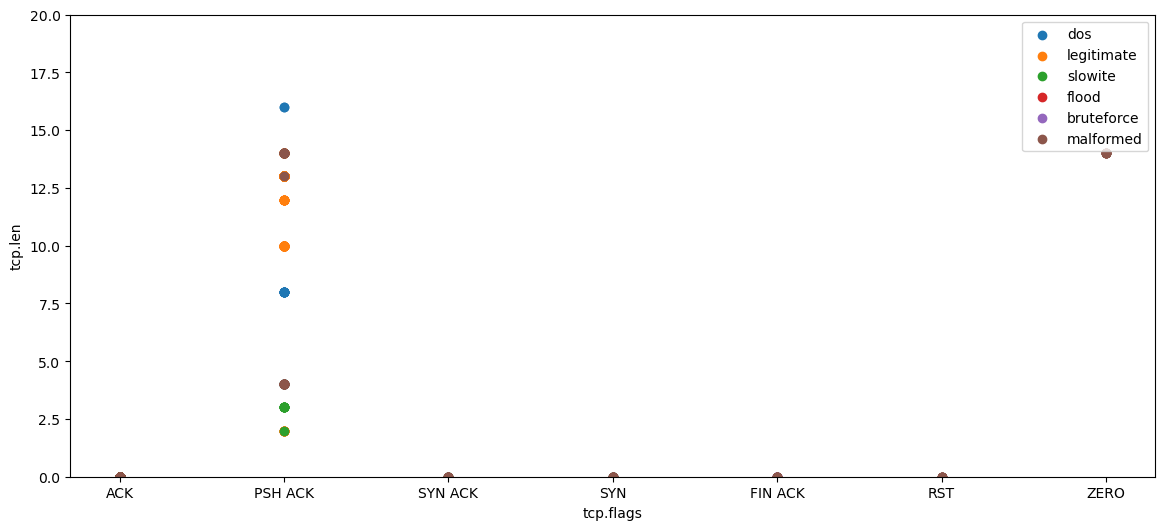

In [13]:
fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['tcp.len'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('tcp.len')

plt.ylim(0,20)


plt.legend()
plt.title('')
plt.show()

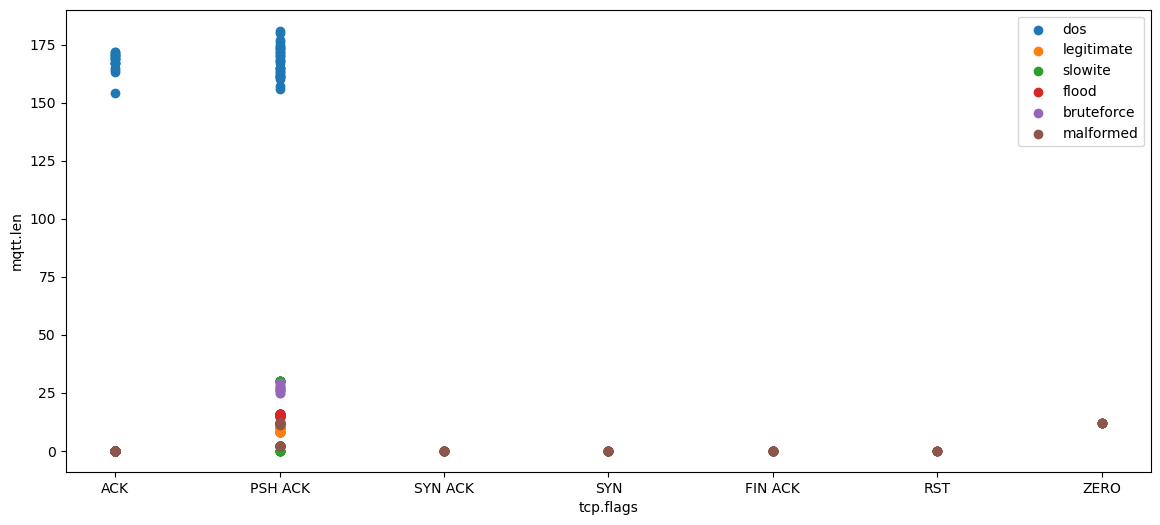

In [14]:
# tamanho da mensagem



fig, ax = plt.subplots(figsize=(14, 6))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.flags'], dataclass['mqtt.len'], label=i)
plt.xlabel('tcp.flags')
plt.ylabel('mqtt.len')

#plt.ylim(0,1000)


plt.legend()
plt.title('')
plt.show()

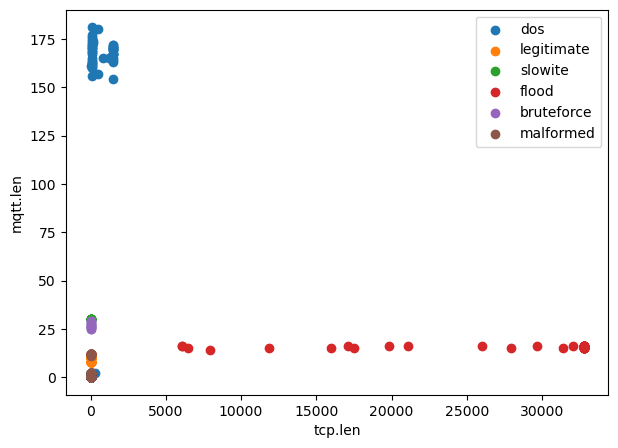

In [15]:
# tamanho do cabeçalho tcp e tamanho da mensagem

fig, ax = plt.subplots(figsize=(7, 5))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.len'], dataclass['mqtt.len'], label=i)
plt.xlabel('tcp.len')
plt.ylabel('mqtt.len')
plt.legend()
plt.title('')
plt.show()

Gráficos em 3D

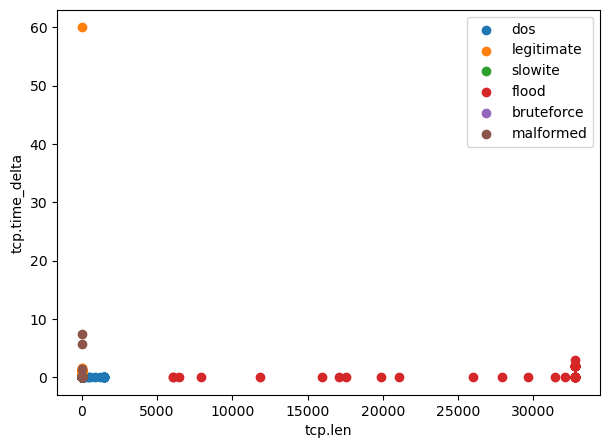

In [16]:
fig, ax = plt.subplots(figsize=(7, 5))
for i in data['target'].unique():
    dataclass = data[data['target'] == i]
    plt.scatter(dataclass['tcp.len'], dataclass['tcp.time_delta'], label=i)
plt.xlabel('tcp.len')
plt.ylabel('tcp.time_delta')
plt.legend()
plt.title('')
plt.show()